# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key 
weather_api_key = "902fd8ce3c581e31b7de43156a4b2fda"

# Output File (CSV)
output_file = "output_data/cities.csv"

# Determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding coordinates (latitude and longitud) and cities
coordinates = []
cities = []

# Create a set of random lat and long combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lat, long)

# Identify nearest city for each lat, long combination
for lat_longs in coordinates:
    city = citipy.nearest_city(lat_longs[0], lat_longs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
 #Lists and counters
new_cities = []
cloud = []
country = []
date = []
humidity = []
temp = []
lats = []
longs = []
wind = []
index_counter = 0
set_counter = 1

In [4]:
# Weather API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

response = requests.get(url + city).json()
response

{'cod': '404', 'message': 'city not found'}

In [5]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# For loop matching city names with cities
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        new_cities.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        longs.append(response["coord"]["lon"])
        temp.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : tiksi
Processing Record 3 of Set 1 : lavrentiya
Processing Record 4 of Set 1 : saint-georges
Processing Record 5 of Set 1 : madera
Processing Record 6 of Set 1 : asau
Processing Record 7 of Set 1 : florianopolis
Processing Record 8 of Set 1 : monrovia
Processing Record 9 of Set 1 : hermanus
City not found. Skipping...
Processing Record 10 of Set 1 : provideniya
Processing Record 11 of Set 1 : albany
Processing Record 12 of Set 1 : chuy
Processing Record 13 of Set 1 : airai
Processing Record 14 of Set 1 : nikolskoye
Processing Record 15 of Set 1 : longyearbyen
Processing Record 16 of Set 1 : cherskiy
City not found. Skipping...
Processing Record 17 of Set 1 : carndonagh
Processing Record 18 of Set 1 : goderich
Processing Record 19 of Set 1 : gizo
Processing Record 20 of Set 1 : klyuchi
Processing Record 21 of Set 1 : lagoa
Processing Record 22 of Set 1 : caxi

Processing Record 40 of Set 4 : tres picos
Processing Record 41 of Set 4 : guerrero negro
Processing Record 42 of Set 4 : pangnirtung
Processing Record 43 of Set 4 : chokurdakh
Processing Record 44 of Set 4 : soe
Processing Record 45 of Set 4 : terrace
Processing Record 46 of Set 4 : sola
Processing Record 47 of Set 4 : new norfolk
Processing Record 48 of Set 4 : kidal
Processing Record 49 of Set 4 : dalbandin
City not found. Skipping...
Processing Record 50 of Set 4 : namatanai
City not found. Skipping...
Processing Record 0 of Set 5 : burnie
Processing Record 1 of Set 5 : lorengau
Processing Record 2 of Set 5 : ribeira grande
Processing Record 3 of Set 5 : altamira
Processing Record 4 of Set 5 : yunyang
Processing Record 5 of Set 5 : belmira
Processing Record 6 of Set 5 : ati
Processing Record 7 of Set 5 : yumen
Processing Record 8 of Set 5 : tooele
Processing Record 9 of Set 5 : cabo san lucas
Processing Record 10 of Set 5 : ligatne
Processing Record 11 of Set 5 : kaitangata
Process

Processing Record 24 of Set 8 : puerto gaitan
Processing Record 25 of Set 8 : kruisfontein
Processing Record 26 of Set 8 : portland
Processing Record 27 of Set 8 : acarau
Processing Record 28 of Set 8 : mahajanga
City not found. Skipping...
Processing Record 29 of Set 8 : juodupe
Processing Record 30 of Set 8 : palmas bellas
Processing Record 31 of Set 8 : megion
Processing Record 32 of Set 8 : salina cruz
Processing Record 33 of Set 8 : sakaiminato
Processing Record 34 of Set 8 : tocopilla
Processing Record 35 of Set 8 : yerbogachen
Processing Record 36 of Set 8 : krasne
Processing Record 37 of Set 8 : damaturu
Processing Record 38 of Set 8 : at-bashi
Processing Record 39 of Set 8 : verkhoyansk
Processing Record 40 of Set 8 : yining
Processing Record 41 of Set 8 : belaya gora
Processing Record 42 of Set 8 : kavieng
Processing Record 43 of Set 8 : amargosa
Processing Record 44 of Set 8 : bairiki
Processing Record 45 of Set 8 : iralaya
Processing Record 46 of Set 8 : goundi
Processing R

Processing Record 6 of Set 12 : harstad
Processing Record 7 of Set 12 : hue
Processing Record 8 of Set 12 : diego de almagro
Processing Record 9 of Set 12 : kloulklubed
Processing Record 10 of Set 12 : sept-iles
Processing Record 11 of Set 12 : college
City not found. Skipping...
-------------------------------
Data Retrieval Complete
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
 #Create a dataframe using information from data retrieval
weather_dict = ({"City" : new_cities, 
                 "Lat" : lats, 
                 "Long" : longs, 
                 "Max Temp" : temp,                            
                 "Humidity" : humidity, 
                 "Clouds" : cloud, 
                 "Wind Speed" : wind, 
                 "Country" : country, 
                 "Date" : date
                 })

weather_data = pd.DataFrame(weather_dict)

In [7]:
# Count weather data
weather_data.count()

City          572
Lat           572
Long          572
Max Temp      572
Humidity      572
Clouds        572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [8]:
# Display dataframe
weather_data.head(10)

,City,Lat,Long,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,63.00,38,50,12.73,AU,1603548173
1,Tiksi,71.69,128.87,11.41,91,39,15.79,RU,1603548255
2,Lavrentiya,65.58,-171.00,32.59,93,93,5.61,RU,1603548255
3,St. George's,12.06,-61.75,87.80,74,40,23.04,GD,1603547997
4,Madera,37.17,-119.83,57.00,62,26,1.66,US,1603548255
5,Asău,46.43,26.40,63.00,68,100,4.00,RO,1603548255
6,Florianópolis,-27.61,-48.50,79.00,78,40,9.17,BR,1603548255
7,Monrovia,6.30,-10.80,86.00,74,75,7.14,LR,1603548255
8,Hermanus,-34.42,19.23,73.99,67,85,5.01,ZA,1603548255
9,Provideniya,64.38,-173.30,32.47,95,88,15.30,RU,1603548255


In [11]:
#Save weather data to a csv file
weather_data.to_csv("output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

weather_data.loc[weather_data['Humidity'] > 100]

,City,Lat,Long,Max Temp,Humidity,Clouds,Wind Speed,Country,Date


##### There are no cities where the humidity is greater than 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

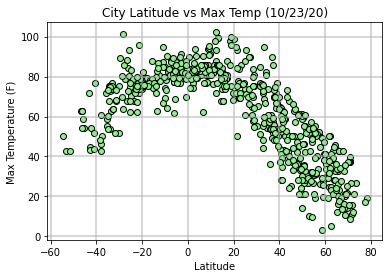

In [96]:
# Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "lightgreen", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.title(f"City Latitude vs Max Temp (10/23/20)")
plt.savefig('Latitude vs Max Temp.png')

## Latitude vs. Humidity Plot

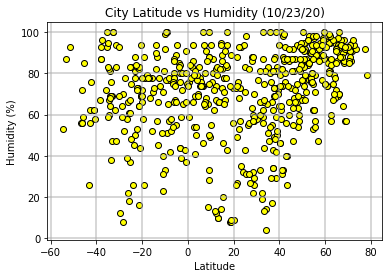

In [14]:
# Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "yellow", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.title(f"City Latitude vs Humidity (10/23/20)")
plt.savefig('Latitude vs Humidity.png')

## Latitude vs. Cloudiness Plot

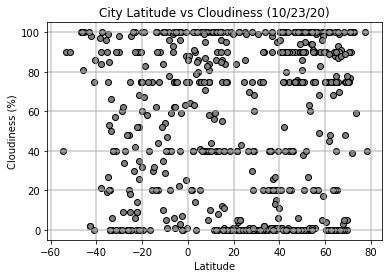

In [15]:
# Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "gray", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.title(f"City Latitude vs Cloudiness (10/23/20)")
plt.savefig('Latitude vs Cloudiness.png')

## Latitude vs. Wind Speed Plot

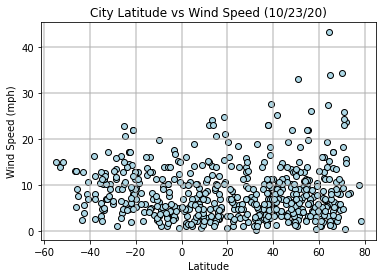

In [16]:
# Latitude vs. Wind Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "lightblue", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.title(f"City Latitude vs Wind Speed (10/23/20)")
plt.savefig('Latitude vs Wind Speed.png')

## Linear Regression

In [41]:
# Generate linear regression on each relationship separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
north = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) >= 0.0, :]
# and Southern Hemisphere (less than 0 degrees latitude):
south = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0.0, :]

In [122]:
# Define a function to plot linear regression
def plot_lr(x_axis, y_axis, x_label, y_label, label_pos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    print(f"The r-squared is: {rvalue}")
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, color = "lightgreen", edgecolor = "black")
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq, label_pos, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.86910574200148


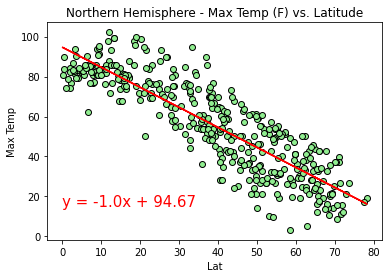

In [139]:
# Define variables for linear regression of northern hemisphere and create linear regression plot function plot_lr
x_label = "Lat"
y_label = "Max Temp"
label_pos = (0,15)
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 5)

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6782443043874532


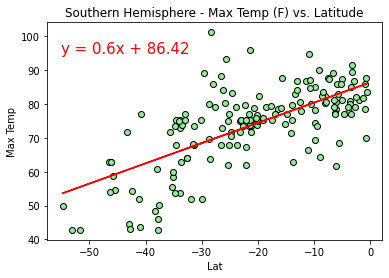

In [140]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Max Temp"
label_pos = (-55,95)
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 6)

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35233088313816163


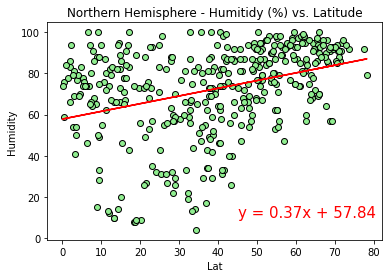

In [141]:
# Define variables for linear regression of northern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Humidity"
label_pos = (45,10)
plt.title("Northern Hemisphere - Humitidy (%) vs. Latitude")
plot_lr(north[x_label], north[y_label], x_label, y_label, label_pos, 7)

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012964517722296998


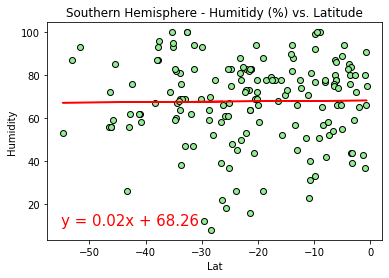

In [147]:
# Define variables for linear regression of southern hemisphere and create linear regression plot using function plot_lr
x_label = "Lat"
y_label = "Humidity"
label_pos = (-55,10)
plt.title("Southern Hemisphere - Humitidy (%) vs. Latitude")
plot_lr(south[x_label], south[y_label], x_label, y_label, label_pos, 7)

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression